In [ ]:
import numpy as np
import pandas as pd
import os

In [6]:
f_scalar(t=0.2, a=0.05, s=1)

0.75

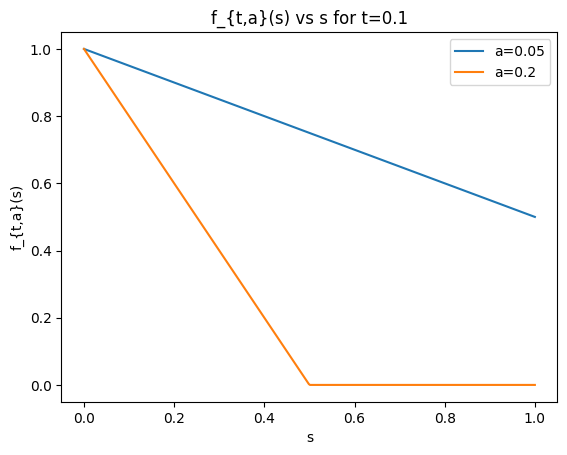

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f_scalar(t, a, s):
    # Handle endpoints t=0, t=1/2, t=1
    if t == 0:
        return (1 - a) if s == 0 else 0.0
    if t == 0.5:
        return 1 - a
    if t == 1:
        # f_{1,a}(s) = f_{0,a}(1-s)
        return (1 - a) if s == 1 else 0.0

    # Now 0 < t < 1
    if t < 0.5:
        # Original definition
        if a >= 0.5:
            return 2*(1 - a)*max(1 - s/(2*t), 0)
        else:
            return max(1 - (a * s)/t, 0)
    else:
        # For t in (0.5, 1): reflect
        t0 = 1 - t
        s0 = 1 - s
        if t0 == 0:
            return (1 - a) if s0 == 0 else 0.0
        if t0 == 0.5:
            return 1 - a
        if a >= 0.5:
            return 2*(1 - a)*max(1 - s0/(2*t0), 0)
        else:
            return max(1 - (a * s0)/t0, 0)

# Vectorize for array inputs
f = np.vectorize(f_scalar)

# Domain of s
s_vals = np.linspace(0, 1, 400)

# Parameter sets
t_list = [0.1]
a_list = [0.05, 0.2]

# Generate plots
for t in t_list:
    plt.figure()
    for a in a_list:
        plt.plot(s_vals, f(t, a, s_vals), label=f"a={a}")
    plt.title(f"f_{{t,a}}(s) vs s for t={t}")
    plt.xlabel("s")
    plt.ylabel("f_{t,a}(s)")
    plt.legend()
    plt.show()
